<a href="https://colab.research.google.com/github/Offliners/NTUME-Introduction-to-Robotics/blob/main/TrajectoryPlanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def IK(x, y):
    L1 = 10
    L2 = 8.5
    theta2 = np.arccos((x ** 2 + y ** 2 - L1 ** 2 - L2 ** 2) / (2 * L1 * L2))
    theta1 = np.arctan2(y, x) - np.arctan2(L2 * np.sin(theta2), L2 * np.cos(theta2) + L1)
    return np.degrees(theta1), np.degrees(theta2)


def TrajectoryPlanner(dx, dy, z, name):
    t_x = []
    t_y = []
    t_z = []
    d_x = []
    d_y = []
    t1 = start_point[0]
    t2 = start_point[1]
    interval = 15
    for i in range(dx.shape[0]):
        for j in range(interval):
            t1 += dx[i] * 1 / interval
            t2 += dy[i] * 1 / interval
            if t1 >= 18.5 or t2 >= 18.5:
              print('warm')
            d_x.append(t1)
            d_y.append(t2)
            temp1, temp2 = IK(t1, t2)
            t_x.append(temp1)
            t_y.append(temp2)
            t_z.append(z[i])

        if z[i]:
          isLift = 'b'
        else:
          isLift = 'dimgray'
        if i == 0:
          plt.plot(d_x[interval * i : interval * i + interval], d_y[interval * i : interval * i + interval], c = isLift)
        else:
          plt.plot(d_x[interval * i - 1: interval * i + interval], d_y[interval * i - 1 : interval * i + interval], c = isLift)

    plt.title(name)
    plt.grid()
    plt.show()

    return t_x, t_y, t_z

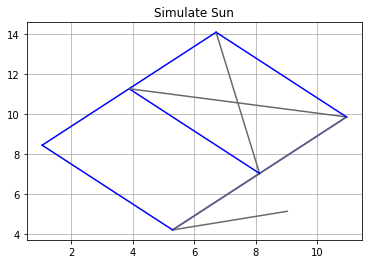

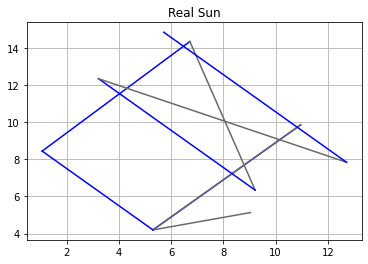

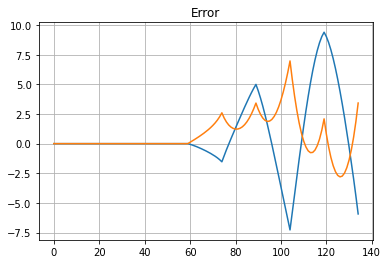

In [11]:
sun_dx_sim = np.array([-4, 5.65685, -5.65685, -4.24264, 5.65685, 1.41421, -4.24264, 7.07107, -4.24264])
sun_dy_sim = np.array([-1, 5.65685, -5.65685, 4.24264, 5.65685, -7.07107, 4.24264, -1.41421, 4.24264])
sun_z_sim = np.array([0, 1, 0, 1, 1, 0, 1, 0, 1])

sun_dx_real = np.array([-4, 5.65685, -5.65685, -4.24264, 5.65685, 2.5, -6, 9.5, -7])
sun_dy_real = np.array([-1, 5.65685, -5.65685, 4.24264, 5.9 , -8, 6, -4.5, 7])
sun_z_real = np.array([0, 1, 0, 1, 1, 0, 1, 0, 1])

start_point = np.array([9.3, 5.2])

t_x_sim, t_y_sim, t_z_sim = TrajectoryPlanner(sun_dx_sim, sun_dy_sim, sun_z_sim, 'Simulate Sun')
t_x_real, t_y_real, t_z_real = TrajectoryPlanner(sun_dx_real, sun_dy_real, sun_z_real, 'Real Sun')

err_x = []
err_y = []
for i in range(len(t_x_sim)):
  err_x.append(t_x_sim[i] - t_x_real[i])
  err_y.append(t_y_sim[i] - t_y_real[i])

t = np.arange(len(err_x))
plt.plot(t, err_x)
plt.plot(t, err_y)
plt.title('Error')
plt.grid()
plt.show()

(21,)
(21,)
(21,)


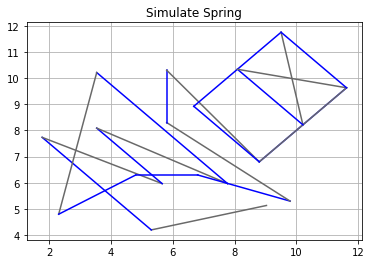

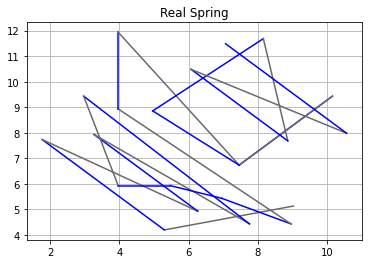

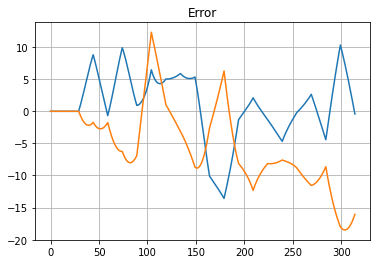

In [12]:
spring_dx_sim = np.array([-4, -3.5355, 3.8891, -2.1213, 4.2426, -4.2426, -1.2323, 2.5, 2, 3, -4, 0, 3, 2.8284, -2.8284, -2.1213, 2.8284, 0.7071, -2.1213, 3.5355, -2.1213])
spring_dy_sim = np.array([-1, 3.5355, -1.7678, 2.1213, -2.1213, 4.2426, -5.4103, 1.5, 0, -1, 3, 2, -3.5, 2.8284, -2.8284, 2.1213, 2.8284, -3.5355, 2.1213, -0.7071, 2.1213])
spring_z_sim = np.array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1])

print(spring_dx_sim.shape)
print(spring_dy_sim.shape)
print(spring_z_sim.shape)

spring_dx_real = np.array([-4, -3.5355, 4.5, -3, 4.5, -4.8, 1, 1.5, 1.5, 2, -5, 0, 3.5, 2.7, -2.7, -2.5, 3.2, 0.7071, -2.8, 4.5, -3.5])
spring_dy_real = np.array([-1, 3.5355, -2.8, 3, -3.5, 5, -3.5, 0, -0.5, -1, 4.5, 3, -5.2, 2.7, -2.7, 2.1213, 2.8284, -4, 2.8, -2.5, 3.5])
spring_z_real = np.array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1])

t_x_sim, t_y_sim, t_z_sim = TrajectoryPlanner(spring_dx_sim, spring_dy_sim, spring_z_sim, 'Simulate Spring')
t_x_real, t_y_real, t_z_real = TrajectoryPlanner(spring_dx_real, spring_dy_real, spring_z_real, 'Real Spring')

err_x = []
err_y = []
for i in range(len(t_x_sim)):
  err_x.append(t_x_sim[i] - t_x_real[i])
  err_y.append(t_y_sim[i] - t_y_real[i])

t = np.arange(len(err_x))
plt.plot(t, err_x)
plt.plot(t, err_y)
plt.title('Error')
plt.grid()
plt.show()